In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20, 5)})

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
# Количество умерших в день
df['Day_dead'] = df['Dead'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
df.loc[0, 'Day_dead'] = df.loc[0, 'Dead']

In [5]:
# Количество новых зараженных в день
df['Day_сonfirmed'] = df['Confirmed'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
df.loc[0, 'Day_сonfirmed'] = df.loc[0, 'Confirmed']

In [6]:
df.head()

,Date,Confirmed,Dead,Day_dead,Day_сonfirmed
0,2020-01-20,278,6,6.0,278.0
1,2020-01-21,309,6,0.0,31.0
2,2020-01-23,571,17,11.0,262.0
3,2020-01-24,830,25,8.0,259.0
4,2020-01-25,1297,41,16.0,467.0


In [7]:
# # таблица в виде изображения
# # https://stackoverflow.com/a/39358752/10418812

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import six

# df_print = df.copy()
# df_print.columns = ['Дата', 'Инф-ных', 'Умерших', 'Умерших за день', 'Инф-ных за день']

# def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
#                      header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
#                      bbox=[0, 0, 1, 1], header_columns=0,
#                      ax=None, **kwargs):
#     if ax is None:
#         size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
#         fig, ax = plt.subplots(figsize=size)
#         ax.axis('off')

#     mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

#     mpl_table.auto_set_font_size(False)
#     mpl_table.set_fontsize(font_size)

#     for k, cell in six.iteritems(mpl_table._cells):
#         cell.set_edgecolor(edge_color)
#         if k[0] == 0 or k[1] < header_columns:
#             cell.set_text_props(weight='bold', color='w')
#             cell.set_facecolor(header_color)
#         else:
#             cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
#     return ax

# render_mpl_table(df_print, header_columns=0, col_width=3.0)

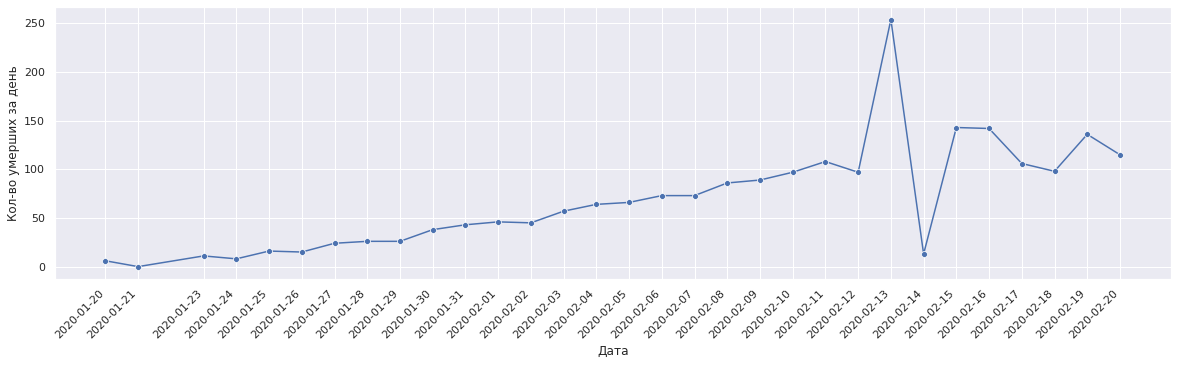

In [8]:
plt.xticks(rotation=45, ha="right")
ax = sns.lineplot(x='Date', y='Day_dead', data=df, marker='o')
ax.set(xlabel='Дата', ylabel='Кол-во умерших за день')
ax.set(xticks=df['Date'].values);

In [9]:
# Исправление выбросов по умершим
df.loc[df['Date'].isin(['2020-02-13', '2020-02-14']), 'Day_dead'] = np.mean(df.loc[df['Date'].isin(['2020-02-13', '2020-02-14']), 'Day_dead'])

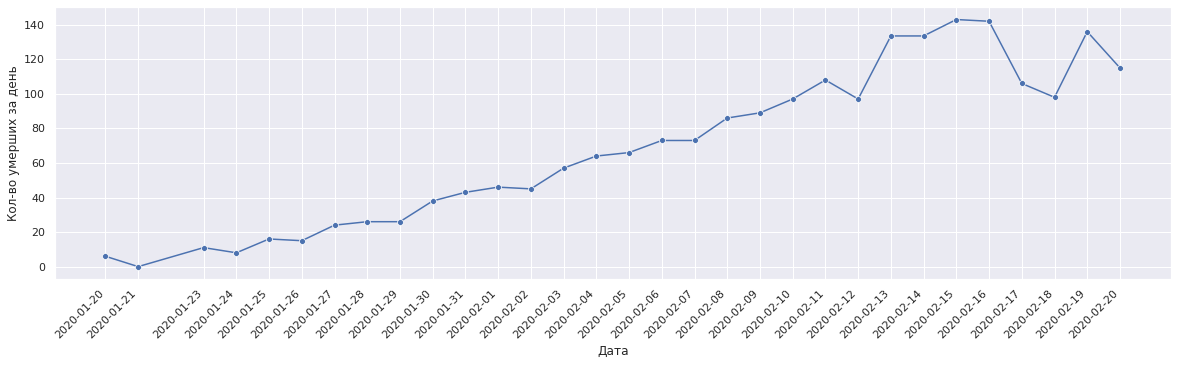

In [10]:
plt.xticks(rotation=45, ha="right")
ax = sns.lineplot(x='Date', y='Day_dead', data=df, marker='o')
ax.set(xlabel='Дата', ylabel='Кол-во умерших за день')
ax.set(xticks=df['Date'].values);

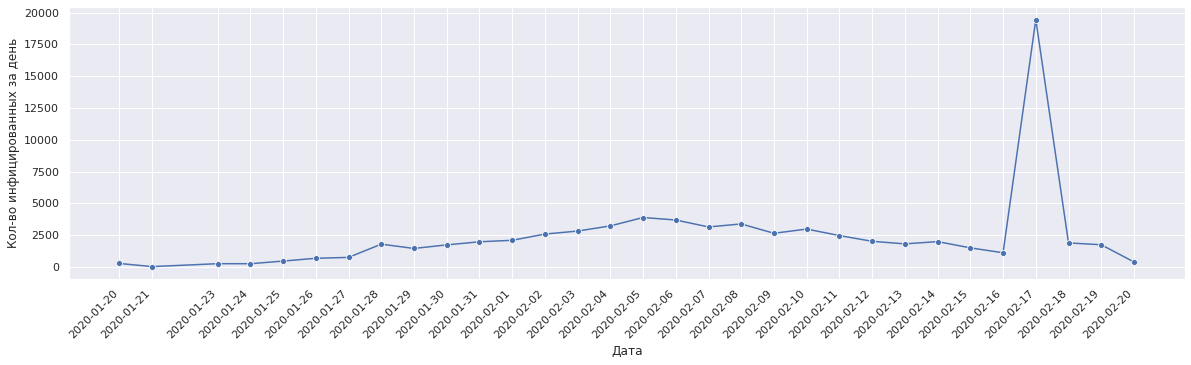

In [11]:
plt.xticks(rotation=45, ha="right")
ax = sns.lineplot(x='Date', y='Day_сonfirmed', data=df, marker='o')
ax.set(xlabel='Дата', ylabel='Кол-во инфицированных за день')
ax.set(xticks=df['Date'].values);

In [12]:
# Исправление выбросов по инфицированным
df.loc[df['Date'] == '2020-02-17', 'Day_сonfirmed'] = np.mean(df.loc[df['Date'].isin(['2020-02-16', '2020-02-18']), 'Day_сonfirmed'])

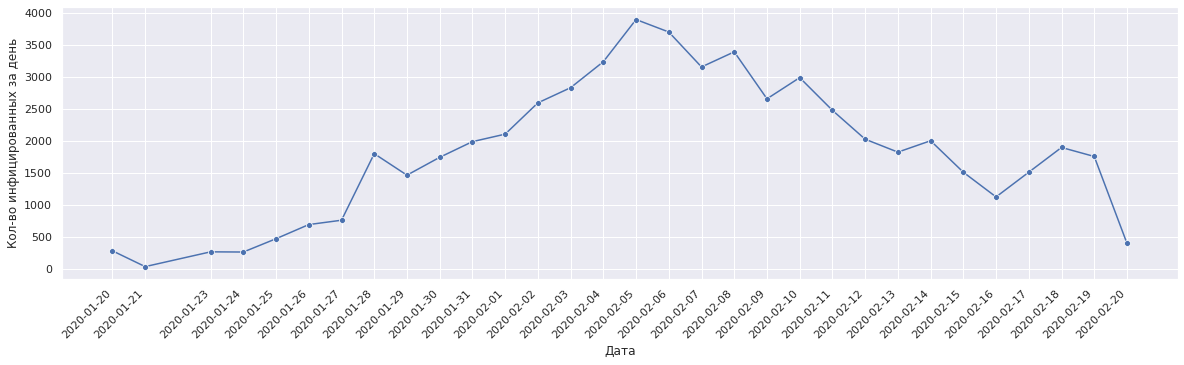

In [13]:
plt.xticks(rotation=45, ha="right")
ax = sns.lineplot(x='Date', y='Day_сonfirmed', data=df, marker='o')
ax.set(xlabel='Дата', ylabel='Кол-во инфицированных за день')
ax.set(xticks=df['Date'].values);

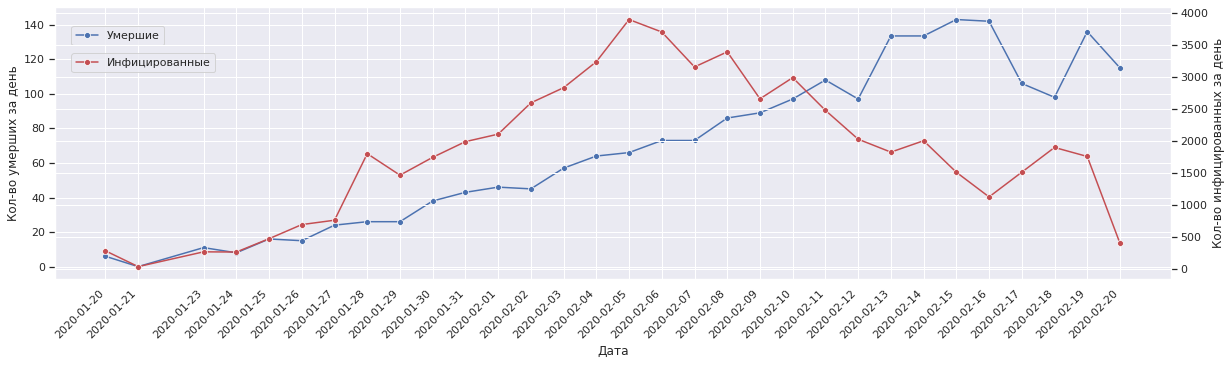

In [14]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha="right")
sns.lineplot(x='Date', y='Day_dead', data=df, ax=ax, color='b', label='Умершие', marker='o')
ax.set(xlabel='Дата', ylabel='Кол-во умерших за день')
plt.legend(bbox_to_anchor=(0.01, 0.95), loc='upper left')
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Day_сonfirmed', data=df, ax=ax2, color='r', label='Инфицированные', marker='o')
ax2.set(ylabel='Кол-во инфицированных за день');
plt.legend(bbox_to_anchor=(0.01, 0.85), loc='upper left');

ax.set(xticks=df['Date'].values);